# Supervised Learning Classification

## Table of Contents:
* [Data Description](#datadescription-bullet)
* [Main Objectives](#mainobjectives-bullet)
* [Data Manipulations](#dataminipulations-bullet)
* [Variations of Learning Classification Models](#variations-bullet)
* [Key Findings](#findings-bullet)
* [Conclusions](#conclusions-bullet)

## Data Description  <a class="anchor" id="datadescription-bullet"></a>

This report offers an analysis of the dataset containing credit card transactions.  The credit card transactions are classified as "fraudulent" or "not fraudulent".  The dataset is from the Brazilian credit card company Elo.

There are 3 comma delimited files that are joined for the analysis:

1) cardholder_info.csv:
This file contains demographic information about the card holder:
* internal_card_mapping: this is is the card id that will be used to tie in to the transaction.
* first_active_month: first month the card was active.
* reward_program: this is a categorical value. Possible values include cash_back,travel and dining_entertainment
* latitude: the latitude where the customer is located.
* longitude: the longitude where the customer is located.
* age: the age of the customer
* fico_score: the FICO score for the client. A FICO score is a credit score created by the Fair Isaac Corporation (FICO).  Lenders use borrowers' FICO scores along with other details on borrowers' credit reports to assess credit risk and determine whether to extend credit

2) merchant_info.csv
This file contains demographic information about the merchant:
* merchant_id: a unique id identifying the merchant. We will use this id to tie in to the transaction.
* merchant_category_id: an id containing the merchant category.
* subsector_description: possible values are: consumer electronics,
   restaurant/dining,
   biotechnology,
   entertainment,
   luxury goods,
   gas,
   inf,
   flights,
   tobacco,
   groceries,
   carpentry,
   real estate investments,
   advertising services,
   magic cards,
   gym,
   internet,
   beauty & personal care,
   real estate services,
   liquor,
   health care technology,
   financial services,
   pharmaceuticals,
   health care services,
   adult industry,
   hotel,
   insurance,
   utilities,
   automobiles,
   office supplies,
   news & journalism,
   semiconductors,
   retail apparel,
   education services,
   astrological services,
   dental,
   software,
   professional photography,
   misc entertainment,
   phone bill
* latitude: the latitude of the merchant
* longitude: the longitude of the merchant

3) transactions.csv
This file contains information about the credit card transactions - including a column indicating if the transaction was fradulent or not.
* transaction_id: a unique id for each transaction
* authorized_flag: a flag indicating if the transaction was authorized or not.
* fraudulent: a flag indicating if the transaction was fraudulent or not.
* purchase_date: transaction date
* card_id: this id ties in to the cardholder data set
* merchant_id: this id ties in to the merchant data set
* merchant_category_id: an id indicating the merchant's category.
* item_category: the item's category
* purchase_amount: amount of purchase
* signature_provided: was a signature provided or not








## Main Objectives <a class="anchor" id="#mainobjectives-bullet"></a>

The objective of this paper is to create a model that can be used to access if a transaction is likely to be fraudulent or not - and to identify the principal factors that can lead to fraudulent transactions.

## Data Manipulations <a class="anchor" id="datamanipulations-bullet"></a>

We initially read the 3 files and join them together into a single dataset.  There are 3 columns that are identified as categorical variables: item_category, reward_program and subsector_description so for our analysis we create dummy columns for each of the different variables/values so we can use them in our analysis.

We use the columns for longitude/latitude in the cardholder's and merchant's file to compute the distance between the two points in miles. We create a enginered variable called "distance_miles" based on these 4 variables using the python library geopy

We are also dropping columns that are irrelevant to our model: transaction_id,card_id,merchant_id,merchant_category_id_trans,item_category,merchant_category_id_merc,
item_category,subsector_description,longitude_merc,latitude_merc, internal_card_mapping,latitude_cardh,longitude_cardh,reward_program,purchase_date,first_active_month,authorized_flag

In [5]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from colorsetup import colors, palette
sns.set_palette(palette)

In [9]:
cardholder_df = pd.read_csv('C:\\Users\\mauro\\Documents\\repo\MachineLearning\\cardholder_info.csv')
merchant_df = pd.read_csv('C:\\Users\\mauro\\Documents\\repo\MachineLearning\\merchant_info.csv')
transactions_df = pd.read_csv('C:\\Users\\mauro\\Documents\\repo\MachineLearning\\transactions.csv')

In [10]:
cardholder_df.head()

,internal_card_mapping,first_active_month,reward_program,latitude,longitude,age,fico_score
0,C_ID_0002709b5a,2015-08,travel,26.580,-101.260,74,672
1,C_ID_0004725b87,2016-10,travel,41.879,-123.992,54,514
2,C_ID_0006152db8,2017-06,travel,34.920,-92.657,77,776
3,C_ID_0007a60a33,2017-06,cash_back,26.085,-80.520,26,788
4,C_ID_000acab1f6,2017-01,dining_entertainment,34.715,-85.300,84,750


In [5]:
merchant_df.head()

,merchant_id,merchant_category_id,subsector_description,latitude,longitude
0,M_ID_0002237144,195,consumer electronics,36.379,-92.815
1,M_ID_00037f6a5d,884,consumer electronics,47.621,-116.221
2,M_ID_0003f9a7c4,437,inf,36.632,-118.880
3,M_ID_00043c6fe0,884,consumer electronics,44.003,-117.808
4,M_ID_000978f3c7,783,entertainment,36.244,-79.456


In [6]:
transactions_df.head()

,transaction_id,authorized_flag,fraudulent,purchase_date,card_id,merchant_id,merchant_category_id,item_category,purchase_amount,signature_provided
0,103016,1.0,0.0,2017-01-01 00:00:59,C_ID_efced389a0,M_ID_18038b5ae7,842,D,266.89,0
1,4539,1.0,0.0,2017-01-01 00:54:29,C_ID_26cfd3ac01,M_ID_6d1e255b72,683,D,69.71,0
2,98212,1.0,0.0,2017-01-01 00:58:34,C_ID_d51ec5b2a2,M_ID_7d5f54f2d4,307,D,50.45,0
3,41960,1.0,0.0,2017-01-01 01:26:59,C_ID_1e97f01da8,M_ID_9e84cda3b1,661,C,477.33,0
4,102851,0.0,1.0,2017-01-01 01:57:45,C_ID_bab0329da7,M_ID_0f61a69a70,360,D,24.77,0


In [11]:
#mergint the 3 dataframes

transactions_merchant_ds = transactions_df.merge( merchant_df, right_on = 'merchant_id', left_on='merchant_id', suffixes=('_trans', '_merc'))

In [12]:
df = transactions_merchant_ds.merge(cardholder_df, left_on='card_id', right_on='internal_card_mapping', suffixes=('_merc','_cardh'))

In [13]:
#computing the new column distance_miles

from  geopy.distance import geodesic

df['distance_miles'] = df.apply(lambda row: geodesic((row['latitude_merc'],row['longitude_merc']),(row['latitude_cardh'],row['longitude_cardh'])).miles, axis=1)

ModuleNotFoundError: No module named 'geopy'

In [14]:
# Examining our categorical variables

categorical_variables = ['item_category', 'reward_program','subsector_description']

[[i, list(df[i].unique())] for i in categorical_variables]

[['item_category', ['D', 'A', 'B', 'C']],
 ['reward_program', ['cash_back', 'travel', 'dining_entertainment']],
 ['subsector_description',
  ['consumer electronics',
   'restaurant/dining',
   'biotechnology',
   'entertainment',
   'luxury goods',
   'gas',
   'inf',
   'flights',
   'tobacco',
   'groceries',
   'carpentry',
   'real estate investments',
   'advertising services',
   'magic cards',
   'gym',
   'internet',
   'beauty & personal care',
   'real estate services',
   'liquor',
   'health care technology',
   'financial services',
   'pharmaceuticals',
   'health care services',
   'adult industry',
   'hotel',
   'insurance',
   'utilities',
   'automobiles',
   'office supplies',
   'news & journalism',
   'semiconductors',
   'retail apparel',
   'education services',
   'astrological services',
   'dental',
   'software',
   'professional photography',
   'misc entertainment',
   'phone bill']]]

In [15]:
# Creating dummy variables for our categorical variables

df_categorical = pd.get_dummies(df[categorical_variables], drop_first=True)

In [16]:
df_categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
item_category_B,120774.0,0.192608,0.394349,0.0,0.0,0.0,0.0,1.0
item_category_C,120774.0,0.192575,0.394323,0.0,0.0,0.0,0.0,1.0
item_category_D,120774.0,0.331147,0.470628,0.0,0.0,0.0,1.0,1.0
reward_program_dining_entertainment,120774.0,0.199348,0.399511,0.0,0.0,0.0,0.0,1.0
reward_program_travel,120774.0,0.199505,0.399630,0.0,0.0,0.0,0.0,1.0
subsector_description_advertising services,120774.0,0.007750,0.087693,0.0,0.0,0.0,0.0,1.0
subsector_description_astrological services,120774.0,0.000439,0.020944,0.0,0.0,0.0,0.0,1.0
subsector_description_automobiles,120774.0,0.007427,0.085860,0.0,0.0,0.0,0.0,1.0
subsector_description_beauty & personal care,120774.0,0.016899,0.128895,0.0,0.0,0.0,0.0,1.0
subsector_description_biotechnology,120774.0,0.018729,0.135568,0.0,0.0,0.0,0.0,1.0


In [17]:
data = pd.concat([df,df_categorical],axis=1)

In [18]:
# Dropping the columns we don't need for our model

df.describe(include='object')

,purchase_date,card_id,merchant_id,item_category,subsector_description,internal_card_mapping,first_active_month,reward_program
count,120774,120774,120774,120774,120774,120774,120774,120774
unique,115723,24725,31398,4,39,24725,73,3
top,2017-11-25 00:00:00,C_ID_272aa0597a,M_ID_e5374dabc0,D,inf,C_ID_272aa0597a,2016-12,cash_back
freq,118,93,3989,39994,33760,93,8098,72603


In [19]:
data = data.drop(['transaction_id','card_id','merchant_id','merchant_category_id_trans','item_category','merchant_category_id_merc',
                 'item_category','subsector_description','longitude_merc','latitude_merc', 'internal_card_mapping','latitude_cardh','longitude_cardh','reward_program','purchase_date','first_active_month','authorized_flag','signature_provided'], axis=1)

In [20]:
data.describe()

,fraudulent,purchase_amount,age,fico_score,item_category_B,item_category_C,item_category_D,reward_program_dining_entertainment,reward_program_travel,subsector_description_advertising services,...,subsector_description_phone bill,subsector_description_professional photography,subsector_description_real estate investments,subsector_description_real estate services,subsector_description_restaurant/dining,subsector_description_retail apparel,subsector_description_semiconductors,subsector_description_software,subsector_description_tobacco,subsector_description_utilities
count,93607.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,...,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000,120774.000000
mean,0.094651,196.655694,57.079471,613.585639,0.192608,0.192575,0.331147,0.199348,0.199505,0.007750,...,0.000480,0.000331,0.007005,0.001697,0.070479,0.015136,0.005216,0.000182,0.005498,0.000546
std,0.292734,564.889726,11.155075,70.152612,0.394349,0.394323,0.470628,0.399511,0.399630,0.087693,...,0.021909,0.018196,0.083401,0.041165,0.255953,0.122093,0.072036,0.013495,0.073944,0.023371
min,0.000000,-226.580000,18.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.390000,51.000000,577.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,77.900000,57.000000,616.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,202.870000,63.000000,653.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,42755.010000,100.000000,850.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120774 entries, 0 to 120773
Data columns (total 47 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   fraudulent                                      93607 non-null   float64
 1   purchase_amount                                 120774 non-null  float64
 2   age                                             120774 non-null  int64  
 3   fico_score                                      120774 non-null  int64  
 4   item_category_B                                 120774 non-null  uint8  
 5   item_category_C                                 120774 non-null  uint8  
 6   item_category_D                                 120774 non-null  uint8  
 7   reward_program_dining_entertainment             120774 non-null  uint8  
 8   reward_program_travel                           120774 non-null  uint8  
 9   subsector_description_adve

As we can see from the dataframe information above - there are quite a few records in the dataset where the fraudulent flag is blank - so we have no way of knowing if the transaction was fraudulent or not.  We will drop rows without fraudulent information from our analysis.

In [22]:
data = data.dropna(subset=['fraudulent'])
data = data.reset_index(drop=True)

data_df = data.copy()
 

In [23]:
data_df.head()

,fraudulent,purchase_amount,age,fico_score,item_category_B,item_category_C,item_category_D,reward_program_dining_entertainment,reward_program_travel,subsector_description_advertising services,...,subsector_description_phone bill,subsector_description_professional photography,subsector_description_real estate investments,subsector_description_real estate services,subsector_description_restaurant/dining,subsector_description_retail apparel,subsector_description_semiconductors,subsector_description_software,subsector_description_tobacco,subsector_description_utilities
0,0.0,266.89,53,569,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,51.63,53,569,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,531.72,53,569,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,82.54,53,569,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,82.54,53,569,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# We will be using KNearestNeighbor as one of our classifiers and since it is sensitive to large values,
# we will use MinMaxScaler to scale the size of the values for purchase_amount, age, fico_score and distance_miles

from sklearn.preprocessing import MinMaxScaler

numeric_variables = ['purchase_amount', 'age', 'fico_score','distance_miles']

mm = MinMaxScaler()
for numeric_variable in numeric_variables:
    data_df[numeric_variable] = mm.fit_transform(data_df[[numeric_variable]])


KeyError: "None of [Index(['distance_miles'], dtype='object')] are in the [columns]"

In [21]:
data_df.head()

,fraudulent,purchase_amount,age,fico_score,distance_miles,item_category_B,item_category_C,item_category_D,reward_program_dining_entertainment,reward_program_travel,...,subsector_description_phone bill,subsector_description_professional photography,subsector_description_real estate investments,subsector_description_real estate services,subsector_description_restaurant/dining,subsector_description_retail apparel,subsector_description_semiconductors,subsector_description_software,subsector_description_tobacco,subsector_description_utilities
0,0.0,0.012158,0.426829,0.489091,0.498338,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.006737,0.426829,0.489091,0.269851,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,0.018827,0.426829,0.489091,0.239894,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,0.007516,0.426829,0.489091,0.531706,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.007516,0.426829,0.489091,0.531706,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# The list below shows the absolute correction between an item being fraudulent and the other transaction variables.
# There is a high correlation for the variables purchase_amount, age, fico_score and distance_miles.

target = 'fraudulent'
y = data_df[target].astype(int)
feature_cols = [x for x in data_df.columns if x != target]
correlations = data_df[feature_cols].corrwith(y)
correlations.abs().sort_values(inplace=True)
correlations

purchase_amount                                   0.064947
age                                               0.009003
fico_score                                       -0.041804
distance_miles                                    0.104066
item_category_B                                   0.045794
item_category_C                                   0.047426
item_category_D                                  -0.054528
reward_program_dining_entertainment              -0.002891
reward_program_travel                            -0.001582
subsector_description_advertising services       -0.002491
subsector_description_astrological services      -0.000731
subsector_description_automobiles                 0.032786
subsector_description_beauty & personal care     -0.007817
subsector_description_biotechnology               0.010520
subsector_description_carpentry                  -0.022656
subsector_description_consumer electronics        0.094323
subsector_description_dental                      0.0052

##  Variations of Learning Classification Models <a class="anchor" id="variations-bullet"></a>

## Splitting data into train and test sets

There is an inbalance between the fraudulent and non-fraudulent transactions.  Fraudulent transactions correspond to only 9.46% of the transactions - therefore we will be using a stratified split to guarantee that the fraudulent records have a valid representation in our train and test sets

In [23]:
print('Percentage of fraudulent records in dataset: ', (data_df[data_df.fraudulent == True].fraudulent.sum()/data_df.shape[0])*100)

Percentage of fraudulent records in dataset:  9.465104105462197


In [24]:
#There is an inbalance between the fraudulent and non-fraudulent transactions in the dataset. 

from sklearn.model_selection import StratifiedShuffleSplit

target = 'fraudulent'
feature_cols = [x for x in data_df.columns if x != target]


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=24000, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data_df[feature_cols], data_df[target]))

# Create the data sets
X_train = data_df.loc[train_idx,feature_cols]
y_train = data_df.loc[train_idx, target]

X_test = data_df.loc[test_idx, feature_cols]
y_test = data_df.loc[test_idx, target]

In [25]:
print('Percentage of fraudulent records in train dataset: ', (sum(y_train == True)/y_train.shape[0])*100)
print('Percentage of fraudulent records in test dataset: ', (sum(y_test == True)/y_test.shape[0])*100)

Percentage of fraudulent records in train dataset:  9.464565345439395
Percentage of fraudulent records in test dataset:  9.466666666666667




We will be testing several classification models to select the best classification method for our data.  We will be using GridSearchCV to select the best hyper-parameters. The following classification models will be tested:

* Logistic Regression
* KNeighbors
* Random Forest
* Decision Tree Classifier
* AdaBoost
* Gradient Boosting

We will be using recall and f1 score to decide which classification model is the best for our problem.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , LogisticRegression())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.7min finished


In [29]:
best_clf.best_estimator_

Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.615848211066026, solver='liblinear'))])

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index(['Logistic Regression']))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     21728
         1.0       0.61      0.01      0.02      2272

    accuracy                           0.91     24000
   macro avg       0.76      0.50      0.48     24000
weighted avg       0.88      0.91      0.86     24000

                     accuracy  precision    recall        f1       auc
Logistic Regression  0.905667   0.611111  0.009683  0.019064  0.504519


In [32]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('classifier' , KNeighborsClassifier())])

param_grid = [
    {'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']}
]

# Create grid search object

clf = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv = 3, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

In [33]:
best_clf.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [34]:
y_pred = best_clf.predict(X_test)

In [35]:

cr = classification_report(y_test, y_pred)
print(cr)

score_df = score_df.append(pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index(['KNeighbors Classifier'])))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     21728
         1.0       0.54      0.03      0.06      2272

    accuracy                           0.91     24000
   macro avg       0.72      0.52      0.51     24000
weighted avg       0.87      0.91      0.87     24000

                       accuracy  precision    recall        f1       auc
Logistic Regression    0.905667   0.611111  0.009683  0.019064  0.504519
KNeighbors Classifier  0.905792   0.538462  0.033891  0.063768  0.515427


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])

param_grid = [
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.3min finished


In [37]:
best_clf.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features=16, n_estimators=60))])

In [38]:
y_pred = best_clf.predict(X_test)

In [39]:

cr = classification_report(y_test, y_pred)
print(cr)

score_df = score_df.append(pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index(['RandomForest Classifier'])))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     21728
         1.0       0.56      0.14      0.23      2272

    accuracy                           0.91     24000
   macro avg       0.74      0.56      0.59     24000
weighted avg       0.88      0.91      0.88     24000

                         accuracy  precision    recall        f1       auc
Logistic Regression      0.905667   0.611111  0.009683  0.019064  0.504519
KNeighbors Classifier    0.905792   0.538462  0.033891  0.063768  0.515427
RandomForest Classifier  0.908333   0.563380  0.140845  0.225352  0.564716


In [40]:
from sklearn.tree import DecisionTreeClassifier

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , DecisionTreeClassifier())])

param_grid = [
    {'classifier' : [DecisionTreeClassifier()],
    'classifier__criterion' : ['entropy','gini'],
    'classifier__max_depth' : [3,4,5,6,7,8,9,10]}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.7s finished


In [41]:
y_pred = best_clf.predict(X_test)

In [42]:

cr = classification_report(y_test, y_pred)
print(cr)

score_df = score_df.append(pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index(['DecionTreeClassifer Classifier'])))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     21728
         1.0       0.54      0.07      0.12      2272

    accuracy                           0.91     24000
   macro avg       0.73      0.53      0.53     24000
weighted avg       0.88      0.91      0.87     24000

                                accuracy  precision    recall        f1  \
Logistic Regression             0.905667   0.611111  0.009683  0.019064   
KNeighbors Classifier           0.905792   0.538462  0.033891  0.063768   
RandomForest Classifier         0.908333   0.563380  0.140845  0.225352   
DecionTreeClassifer Classifier  0.906250   0.539855  0.065581  0.116954   

                                     auc  
Logistic Regression             0.504519  
KNeighbors Classifier           0.515427  
RandomForest Classifier         0.564716  
DecionTreeClassifer Classifier  0.529868  


In [43]:

from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

In [44]:
y_pred = GV_ABC.predict(X_test)

In [45]:

cr = classification_report(y_test, y_pred)
print(cr)

score_df = score_df.append(pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index(['AdaBoost Classifier'])))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     21728
         1.0       0.69      0.06      0.10      2272

    accuracy                           0.91     24000
   macro avg       0.80      0.53      0.53     24000
weighted avg       0.89      0.91      0.87     24000

                                accuracy  precision    recall        f1  \
Logistic Regression             0.905667   0.611111  0.009683  0.019064   
KNeighbors Classifier           0.905792   0.538462  0.033891  0.063768   
RandomForest Classifier         0.908333   0.563380  0.140845  0.225352   
DecionTreeClassifer Classifier  0.906250   0.539855  0.065581  0.116954   
AdaBoost Classifier             0.908292   0.691892  0.056338  0.104192   

                                     auc  
Logistic Regression             0.504519  
KNeighbors Classifier           0.515427  
RandomForest Classifier         0.564716  
DecionTreeClassifer Classifier  0.529868  
AdaBoos

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# The parameters to be fit
param_grid = {'n_estimators': [15, 25, 50, 100, 200, 400],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [47]:
y_pred = GV_GBC.predict(X_test)

In [48]:

cr = classification_report(y_test, y_pred)
print(cr)

score_df = score_df.append(pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index(['GradientBoosting Classifier'])))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     21728
         1.0       0.68      0.11      0.19      2272

    accuracy                           0.91     24000
   macro avg       0.80      0.55      0.57     24000
weighted avg       0.89      0.91      0.88     24000

                                accuracy  precision    recall        f1  \
Logistic Regression             0.905667   0.611111  0.009683  0.019064   
KNeighbors Classifier           0.905792   0.538462  0.033891  0.063768   
RandomForest Classifier         0.908333   0.563380  0.140845  0.225352   
DecionTreeClassifer Classifier  0.906250   0.539855  0.065581  0.116954   
AdaBoost Classifier             0.908292   0.691892  0.056338  0.104192   
GradientBoosting Classifier     0.911042   0.680739  0.113556  0.194644   

                                     auc  
Logistic Regression             0.504519  
KNeighbors Classifier           0.515427  
RandomForest Class

In [49]:
from sklearn.ensemble import VotingClassifier

LR_L2 = LogisticRegression(penalty='l2', max_iter=500, solver='saga').fit(X_train, y_train)

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR_L2', LR_L2), ('GBC', GV_GBC)]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)



In [50]:
y_pred = VC.predict(X_test)

In [51]:

cr = classification_report(y_test, y_pred)
print(cr)

score_df = score_df.append(pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index(['Voting Classifier'])))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     21728
         1.0       0.80      0.04      0.08      2272

    accuracy                           0.91     24000
   macro avg       0.86      0.52      0.51     24000
weighted avg       0.90      0.91      0.87     24000

                                accuracy  precision    recall        f1  \
Logistic Regression             0.905667   0.611111  0.009683  0.019064   
KNeighbors Classifier           0.905792   0.538462  0.033891  0.063768   
RandomForest Classifier         0.908333   0.563380  0.140845  0.225352   
DecionTreeClassifer Classifier  0.906250   0.539855  0.065581  0.116954   
AdaBoost Classifier             0.908292   0.691892  0.056338  0.104192   
GradientBoosting Classifier     0.911042   0.680739  0.113556  0.194644   
Voting Classifier               0.908167   0.803571  0.039613  0.075503   

                                     auc  
Logistic Regression          

## Key Findings <a class="anchor" id="keyfindings-bullet"></a>

The model with the best performance (f1 and recall) is Random Forest.  We therefore select Random Forest to proceed with our analysis.

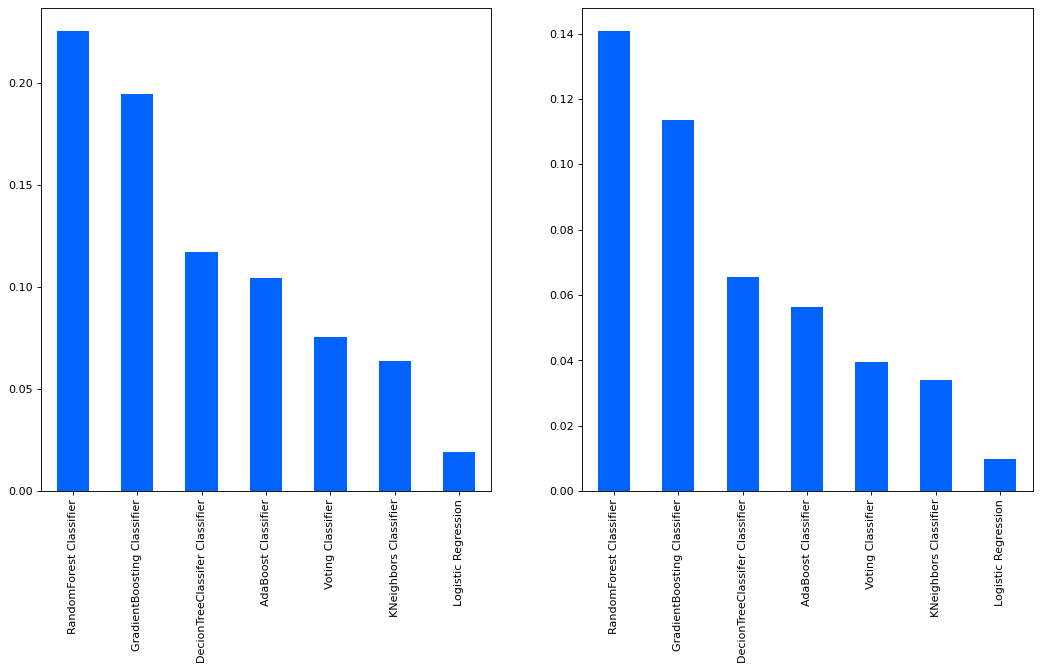

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8), dpi=80)
plt.subplot(1,2,1)
score_df.sort_values('f1', ascending=False).f1.plot.bar(x='score', y='Classifier')
plt.subplot(1,2,2)
plt = score_df.sort_values('recall', ascending=False).recall.plot.bar(x='score', y='Classifier')

In [53]:
RF = RandomForestClassifier(max_features=16, n_estimators=70)
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)


### Feature Importance

We plot the top 20 features and sort them by order of importance (absolute value).  Distance in miles is the most important feature, followed by the purchase amount, fico score and age.

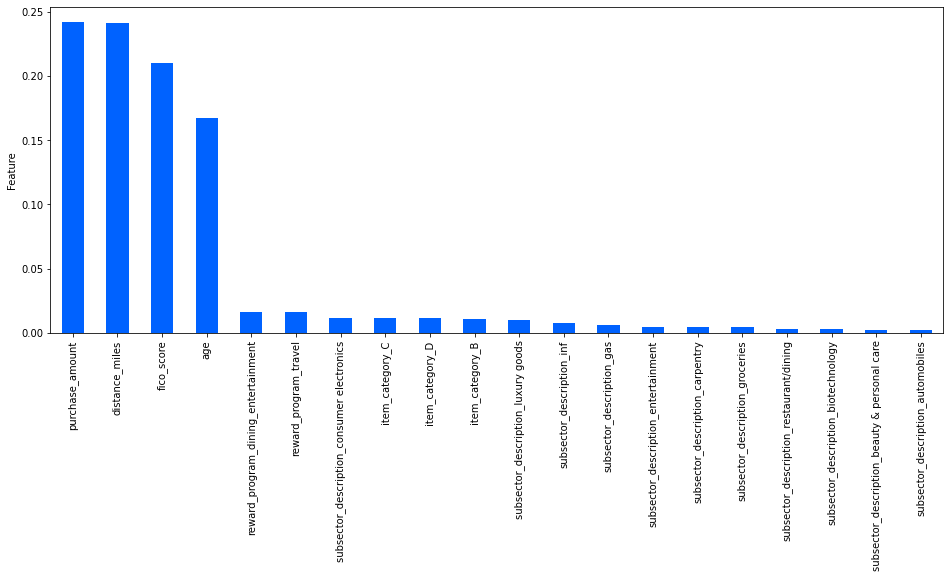

In [54]:
feature_imp = pd.Series(RF.feature_importances_, index=feature_cols).sort_values(ascending=False)[:20]

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

### Feature Importance - Age

The plot below shows that fraud appears to show more frequently for customers between the ages of 30 and 75.  There is less frequency of fraud for customers that are 75 and older.


Populating the interactive namespace from numpy and matplotlib


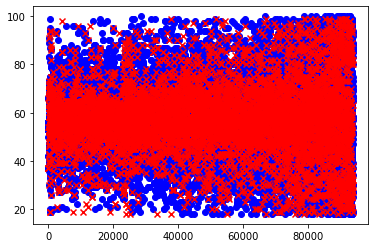

In [62]:
%pylab inline

data_fraudulent = data[data_df.fraudulent==True]
data_good = data[data.fraudulent==False]
plt.scatter(data_good.index, data_good.age, marker='o', c = 'blue')
plt.scatter(data_fraudulent.index, data_fraudulent.age, marker='x', c = 'red')

### Feature Importance - Purchase Amount

It appears that the majority of fraudulent amounts are below $10,000.  

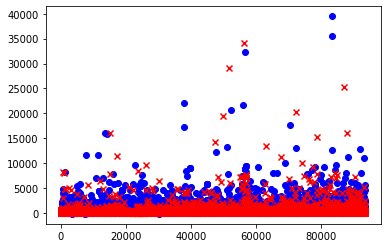

In [63]:

plt.scatter(data_good.index, data_good.purchase_amount, marker='o', c = 'blue')
plt.scatter(data_fraudulent.index, data_fraudulent.purchase_amount, marker='x', c = 'red')

### Feature Importance - Distance Miles

It appears that transactions where the distance between the customer and and the vendor is small are less likely to be fraudulent.

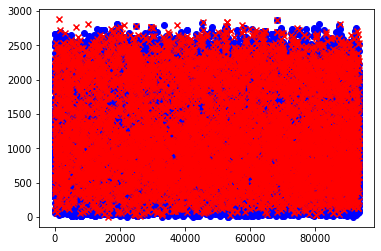

In [64]:

plt.scatter(data_good.index, data_good.distance_miles, marker='o', c = 'blue')
plt.scatter(data_fraudulent.index, data_fraudulent.distance_miles, marker='x', c = 'red')

### Feature Importance - Fico Score

The below plot shows that faud is less likely to occur for customers with high fico scores.

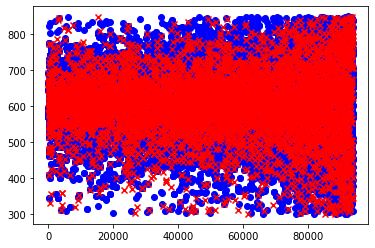

In [65]:

plt.scatter(data_good.index, data_good.fico_score, marker='o', c = 'blue')
plt.scatter(data_fraudulent.index, data_fraudulent.fico_score, marker='x', c = 'red')

### Confusion Matrix

The below classification report and confusion matrix shows how our model is doing: 

In [66]:

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     21728
         1.0       0.56      0.14      0.23      2272

    accuracy                           0.91     24000
   macro avg       0.74      0.57      0.59     24000
weighted avg       0.88      0.91      0.88     24000



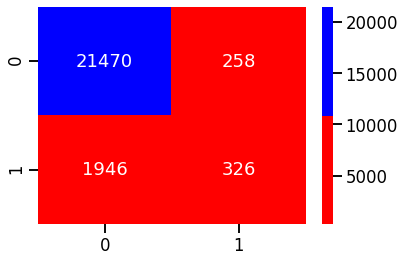

In [67]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
### END SOLUTION

Our model does not do well when you look at the precision (0.56), recall (0.14) or f1-score (0.23) on the test set. This model would not be very useful to predict if a transaction is fraudulent or not - we would probably want a model with a much higher recall score because we want to to be right about fraudulent transactions more frequently. For our dataset - the worst case scenario is to have a transaction that was fraudulent and it was not flagged - therefore we want to increase the number of true positives in our model and decrease the number of false negatives - thus making the recall value greater.  The precision is also very low - because we are identifying several records incorrectly as false positives.

## Conclusions  <a class="anchor" id="conclusions-bullet"></a>

We need to try other methods to improve the model's precision/recall the model including:

* Upsampling
* Downsampling
* Variable interactions
* Using Nystroem classifer 

There may be some interactions between the variables that we are missing - we should explore creating these interactions.  I belive that the Nystroem classifier creates these interactions.
